In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [3]:

dataset_path = "/content/drive/MyDrive/data/17Flowers/train"


idg = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    brightness_range=(0.8,1.2),
    zoom_range=0.1,
    shear_range=0.1,
    rotation_range=10,
    validation_split=0.2
)

train_data = idg.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    subset='training'
)

val_data = idg.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


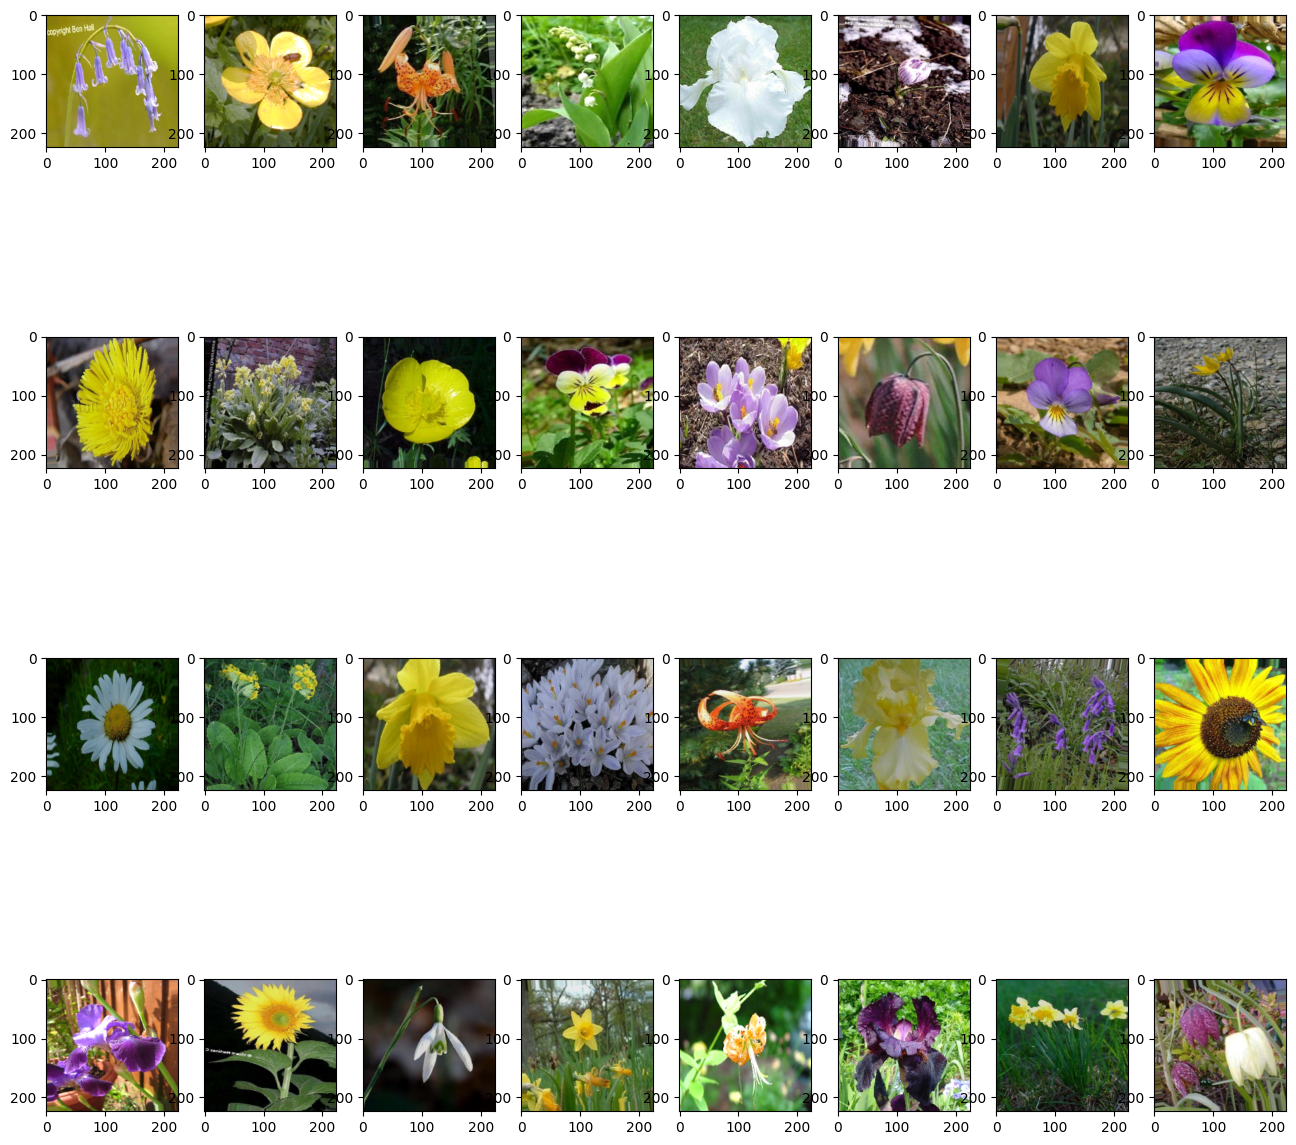

In [4]:
some_images=next(train_data)
X=some_images[0]
Y=some_images[1]

plt.figure(figsize=(16,16))
for i in range(32):
  plt.subplot(4,8,i+1)
  plt.imshow(X[i])


In [5]:
model = tf.keras.applications.vgg16.VGG16(
                                        weights="imagenet",
                                        input_shape=(224,224,3),
                                        include_top=False,
                                       )

In [6]:
my_model = tf.keras.models.Sequential([
    model,
    layers.Flatten(),
    layers.Dense(1024,activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(17,activation='softmax')
])

In [7]:
my_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

In [9]:
plt_model = my_model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
26/26 [==============================] - 24s 930ms/step - loss: 0.0239 - accuracy: 0.9915 - val_loss: 0.8712 - val_accuracy: 0.8426
Epoch 2/10
26/26 [==============================] - 24s 909ms/step - loss: 0.0629 - accuracy: 0.9781 - val_loss: 0.6537 - val_accuracy: 0.8832
Epoch 3/10
26/26 [==============================] - 23s 891ms/step - loss: 0.0306 - accuracy: 0.9927 - val_loss: 0.3510 - val_accuracy: 0.9086
Epoch 4/10
26/26 [==============================] - 23s 869ms/step - loss: 0.0482 - accuracy: 0.9806 - val_loss: 0.8313 - val_accuracy: 0.8325
Epoch 5/10
26/26 [==============================] - 22s 816ms/step - loss: 0.0791 - accuracy: 0.9745 - val_loss: 0.6202 - val_accuracy: 0.8883
Epoch 6/10
26/26 [==============================] - 22s 827ms/step - loss: 0.0352 - accuracy: 0.9915 - val_loss: 0.3751 - val_accuracy: 0.9086
Epoch 7/10
26/26 [==============================] - 23s 890ms/step - loss: 0.0253 - accuracy: 0.9939 - val_loss: 0.3294 - val_accuracy: 0.9086

In [10]:
my_model.save("17_Flowers.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
